In [1]:
import subprocess

command = ['python', 'train.py', '--input_length', '5']
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

output, error = process.communicate()

with open('training_log.txt', 'w') as f:
    f.write(output)

print("训练完成，输出已保存到 training_log.txt")

训练完成，输出已保存到 training_log.txt


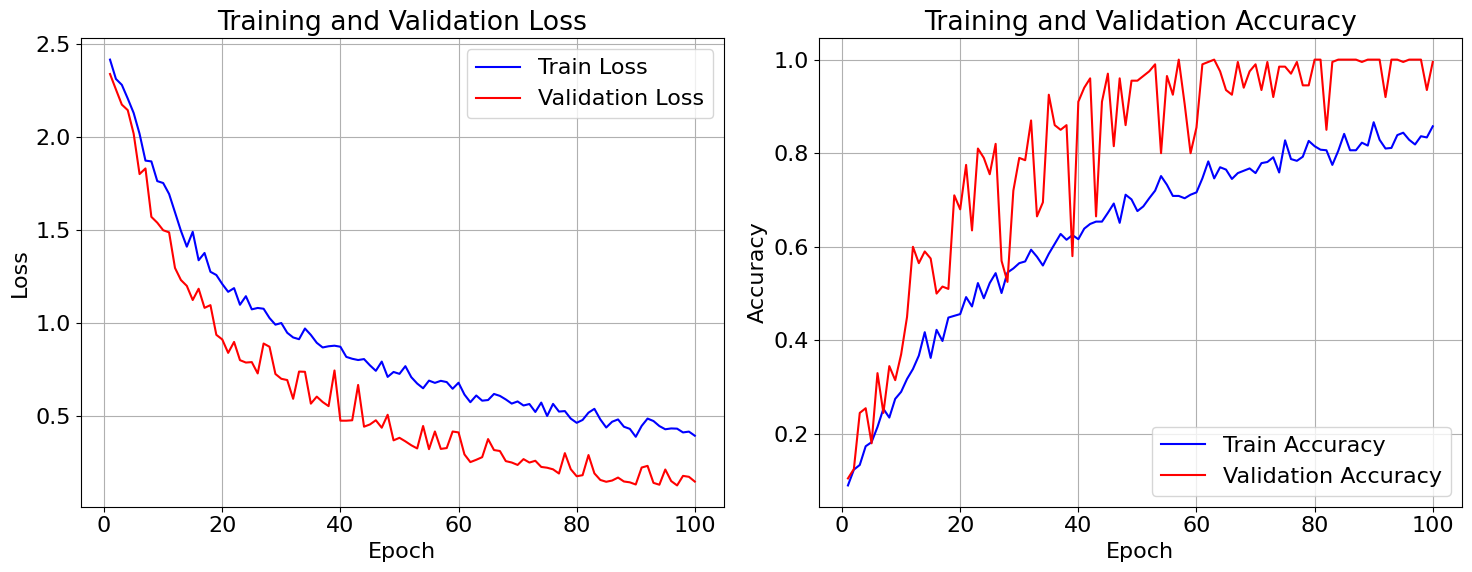

Final Training Loss: 0.3915
Final Training Accuracy: 0.8575
Final Validation Loss: 0.1444
Final Validation Accuracy: 0.9950


In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 从文件读取训练日志
with open('training_log.txt', 'r') as f:
    output = f.read()

# 解析输出以提取每个epoch的指标
epochs = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for line in output.split('\n'):
    match = re.search(r'Epoch \[(\d+)/\d+\] Train Loss: ([\d.]+), Train Accuracy: ([\d.]+), Val Loss: ([\d.]+), Val Accuracy: ([\d.]+)', line)
    if match:
        epoch, train_loss, train_acc, val_loss, val_acc = map(float, match.groups())
        epochs.append(epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

# 创建两个子图
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 16})

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# 准确率曲线
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('len_5.pdf')
plt.show()

# 打印最终的训练结果
if epochs:  # 确保有数据再打印
    print(f"Final Training Loss: {train_losses[-1]:.4f}")
    print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")
else:
    print("No training data found in the log file.")